<b>Sprawozdanie - PyAge - Anna Alberska</b>

Wybrane rozwiązanie: <b>TSP</b>: problem komiwojażera. 
Problem rozwiązywany na układzie 200x200 dla 20 punktów.
Genotypem jest wybrana trasa przechodząca przez przez wszystkie punkty zapisane w postaci listy.

Evaluation(fitness) jest wyliczany za pomocą obliczenia odległości między konkretnymi punktami, a następnie zsumowania całej trasy.

Natomiast rozwiązania są crossowane poprzez wycięcie losowego fragmentu pierwszego rodzica i wstawienie go na koniec drugiego po wcześniejszym usunięciu odpowiednich punktów z drugiego.

Stworzone mutacje:
- <b>RandomOrderMutation</b> - losowanie liczby zamian, a następnie zamiana losowych punktów w kolejności drogi

np.: dla trasy <b>[1 0 2 5 3 4 6]</b> wylosowano liczbę zmian równą 2, a następnie wylosowano indeksy 0 i 1 oraz 0 i 5, tak że nowa trasa wygląda następująco: <b>[4 1 2 5 3 0 6]</b>

- <b>CutAndChangeMutation</b> - losowanie wybranego podziału trasy i zamiana fragmentów kolejnością
 
np.: dla trasy <b>[1 0 2 5 3 4 6]</b> wylosowany indeks 2 i podzielono tak, że nowa trasa jest następująca: <b>[5 3 4 6 1 0 2]</b>
 
- <b>MoveOneBackMutation</b> - przesunięcie wszystkich punktów o 1 do tyłu w zapisie trasy

np.: dla trasy <b>[1 0 2 5 3 4 6]</b> zwrócono nową trasę: <b>[0 2 5 3 4 6 1]</b>

Modyfikowane następujące parametry:
- rodzaj modelu
- typ mutacji
- prawdopodobieństwo mutacji

Skrypt został uruchomiony dla poszczególnych parametrów:
- EMAS mutacja = MoveOneBackMutation prawdopodobieństwo_mutacji = 0.5 %
- EMAS mutacja = RandomOrderMutation prawdopodobieństwo_mutacji = 0.5 %
- EMAS mutacja = MoveOneBackMutation prawdopodobieństwo_mutacji = 1 %
- EMAS mutacja = RandomOrderMutation prawdopodobieństwo_mutacji = 1 %
- EMAS mutacja = MoveOneBackMutation prawdopodobieństwo_mutacji = 5 %
- EMAS mutacja = RandomOrderMutation prawdopodobieństwo_mutacji = 5 %
- Evolutionary mutacja = CutAndChangeMutation prawdopodobieństwo_mutacji = 0.5 %
- Evolutionary mutacja = MoveOneBackMutation prawdopodobieństwo_mutacji = 0.5 %
- Evolutionary mutacja = RandomOrderMutation prawdopodobieństwo_mutacji = 0.5 %
- Evolutionary mutacja = CutAndChangeMutation prawdopodobieństwo_mutacji = 1 %
- Evolutionary mutacja = MoveOneBackMutation prawdopodobieństwo_mutacji = 1 %
- Evolutionary mutacja = RandomOrderMutation prawdopodobieństwo_mutacji = 1 %
- Evolutionary mutacja = CutAndChangeMutation prawdopodobieństwo_mutacji = 5 %
- Evolutionary mutacja = MoveOneBackMutation prawdopodobieństwo_mutacji = 5 %
- Evolutionary mutacja = RandomOrderMutation prawdopodobieństwo_mutacji = 5 %

<b> Porównanie wyników - wstęp</b>

In [91]:
import os

by_alg_type = {"EMAS": [], "Evolutionary": []}
by_mut_type = {"CutAndChange": [], "MoveOneBack": [], "RandomOrder": []}
by_mut_prob = {"0.5": [], "1": [], "5": []}

for filename in os.listdir("pyage/Alberska_Tsp/Dane"):
    alg, mut_type, mut_prob, _, _ = filename.split("_")
    
    by_alg_type[alg].append(filename)
    by_mut_type[mut_type].append(filename)
    by_mut_prob[mut_prob].append(filename)

In [92]:
def get_data(by_what, index):
    steps = []
    fitnesses = []
    labels = []
    for filename in by_what[index]:
        labels.append(filename.split(".csv")[0])
        with open("pyage/Alberska_Tsp/Dane/" + filename) as f:
            lines = f.readlines()
            
        temp_steps = []
        temp_fitnesses = []
        
        for line in lines:
            step, fitness = line.split(";")
            fitness = fitness.split("\n")[0]
            temp_steps.append(int(step))
            temp_fitnesses.append(float(fitness))
            
        steps.append(temp_steps)
        fitnesses.append(temp_fitnesses)
    
    return labels, steps, fitnesses

In [93]:
import matplotlib.pyplot as plt
def plot_the_plot(labels, steps, fitnesses, fig_size):
    length = len(steps)
    plt.figure(figsize=fig_size)
    for i in range(length):
        plt.plot(steps[i], fitnesses[i], label=labels[i])
    plt.legend()
    plt.xlabel('steps')
    plt.ylabel('fitness')
    plt.show()

<b>Wyłącznie EMAS</b>

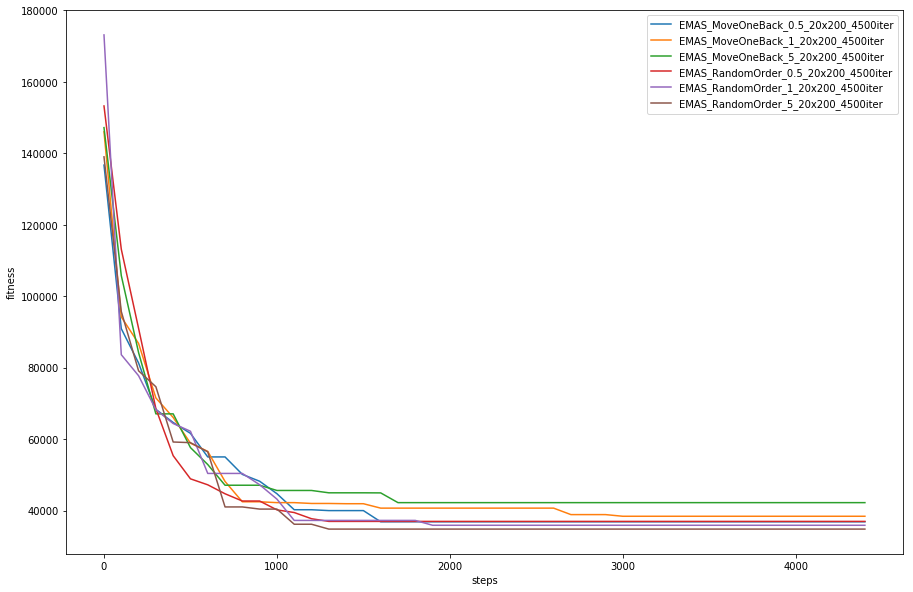

In [94]:
labels_1, steps_1, fitnesses_1 = get_data(by_alg_type, "EMAS")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15,10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest EMAS z mutacją RandomOrder oraz jej prawdopodobieństwem wynoszącym 5%.

<b>Wyłącznie algorytm ewolucyjny</b>

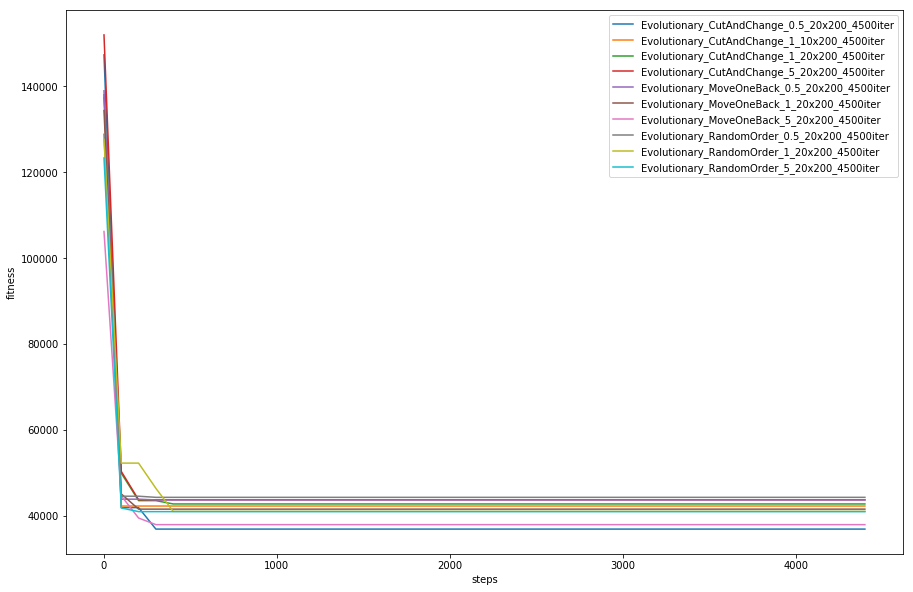

In [95]:
labels_1, steps_1, fitnesses_1 = get_data(by_alg_type, "Evolutionary")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15, 10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest Evolutionary z mutacją CutAndChange oraz jej prawdopodobieństwem wynoszącym 0.5%.

<b>Wyłącznie typ mutacji: RandomOrderMutation </b>

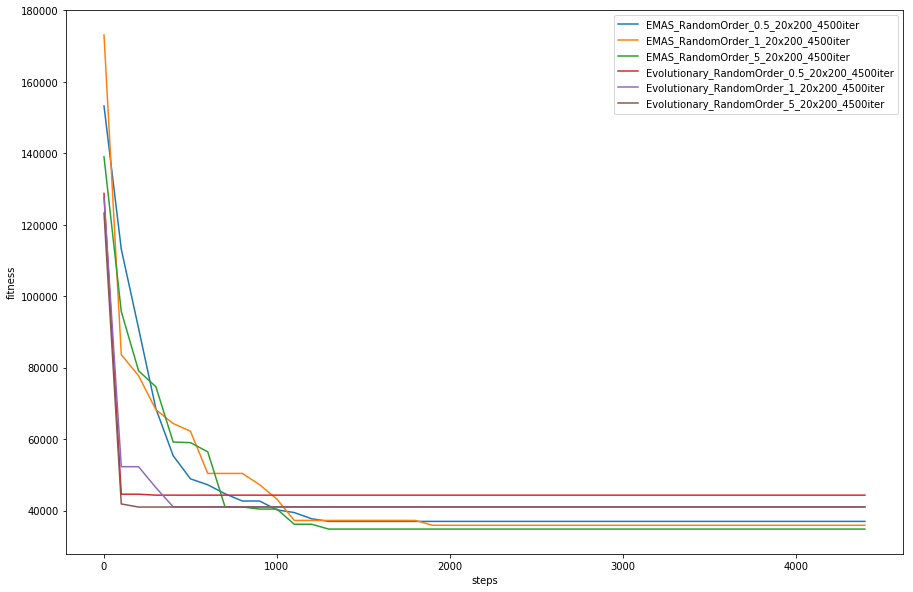

In [96]:
labels_1, steps_1, fitnesses_1 = get_data(by_mut_type, "RandomOrder")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15, 10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest EMAS z mutacją RandomOrder oraz jej prawdopodobieństwem wynoszącym 5%.

<b>Wyłącznie typ mutacji: CutAndChange </b>

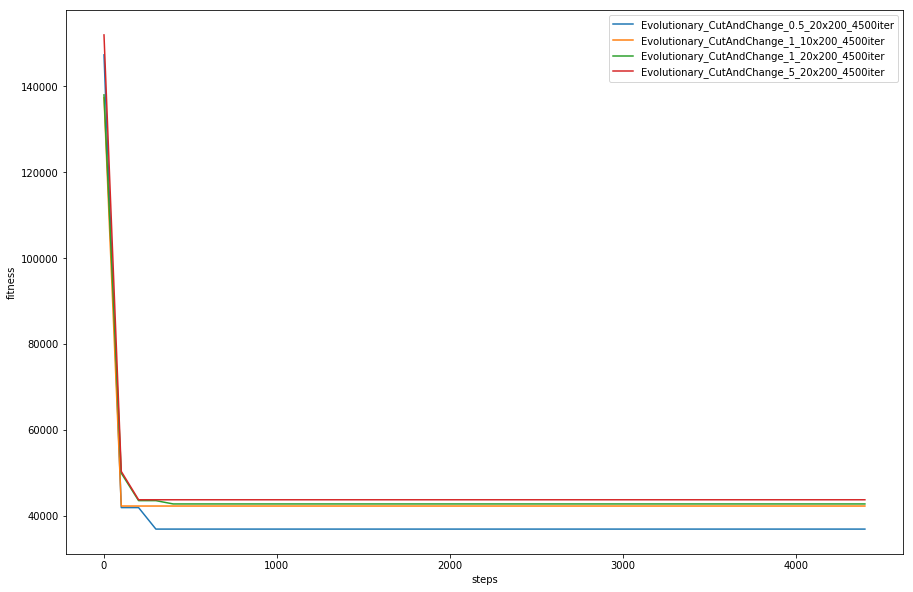

In [97]:
labels_1, steps_1, fitnesses_1 = get_data(by_mut_type, "CutAndChange")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15, 10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest Evolutionary z mutacją CutAndChange oraz jej prawdopodobieństwem wynoszącym 0.5%.

<b>Wyłącznie typ mutacji:  MoveOneBack </b>

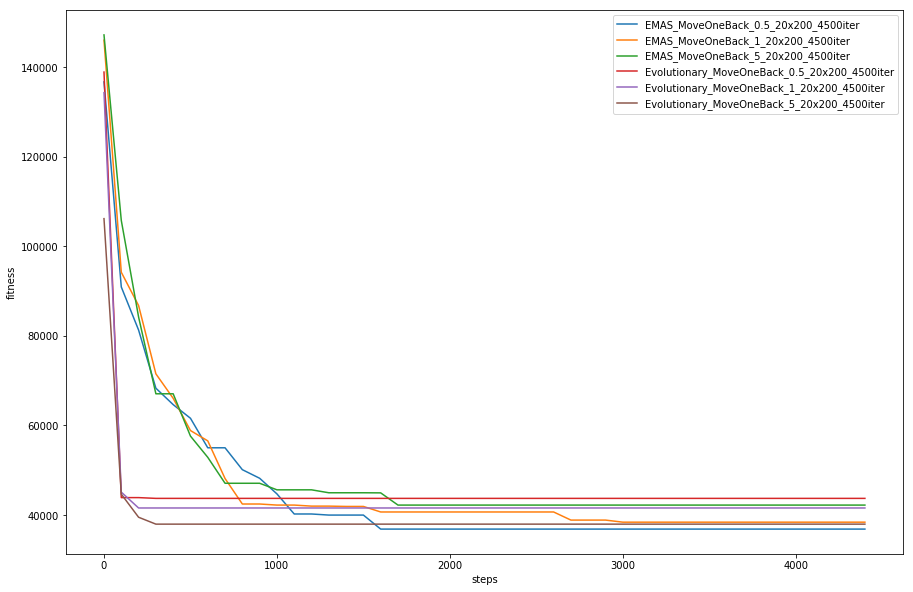

In [98]:
labels_1, steps_1, fitnesses_1 = get_data(by_mut_type, "MoveOneBack")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15, 10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest EMAS z mutacją MoveOneBack oraz jej prawdopodobieństwem wynoszącym 0.5%.

<b>Wyłącznie prawdopodobieństwo mutacji:  0.5 </b>

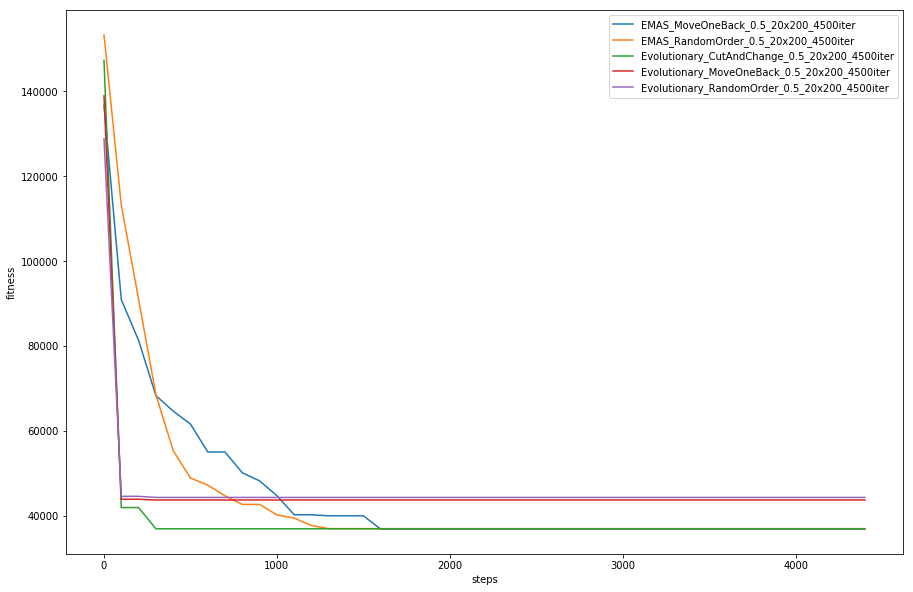

In [99]:
labels_1, steps_1, fitnesses_1 = get_data(by_mut_prob, "0.5")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15, 10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest Evolutionary z mutacją CutAndChange oraz jej prawdopodobieństwem wynoszącym 0.5%.

<b>Wyłącznie prawdopodobieństwo mutacji:  1 </b>

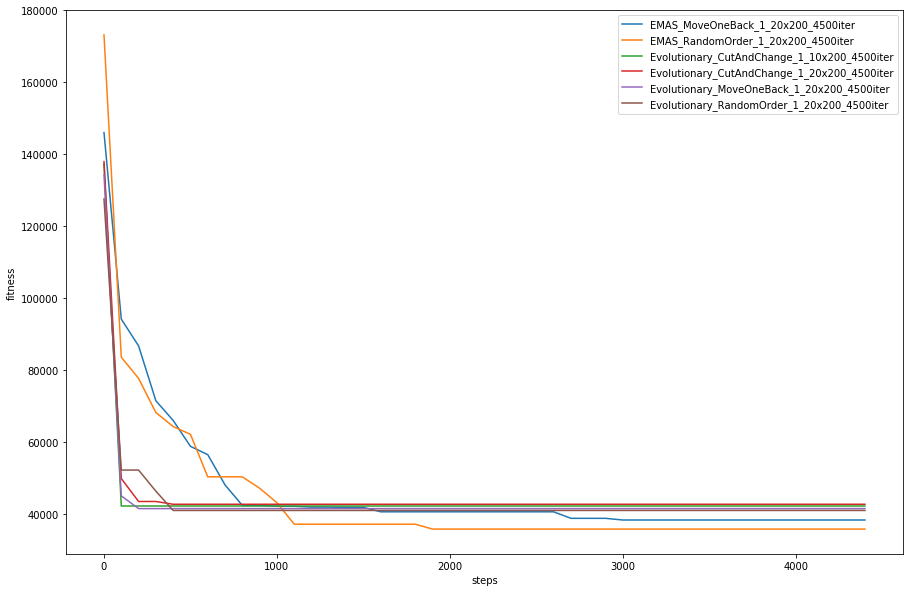

In [100]:
labels_1, steps_1, fitnesses_1 = get_data(by_mut_prob, "1")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15, 10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest EMAS z mutacją RandomOrder oraz jej prawdopodobieństwem wynoszącym 1%.

<b>Wyłącznie prawdopodobieństwo mutacji: 5</b>

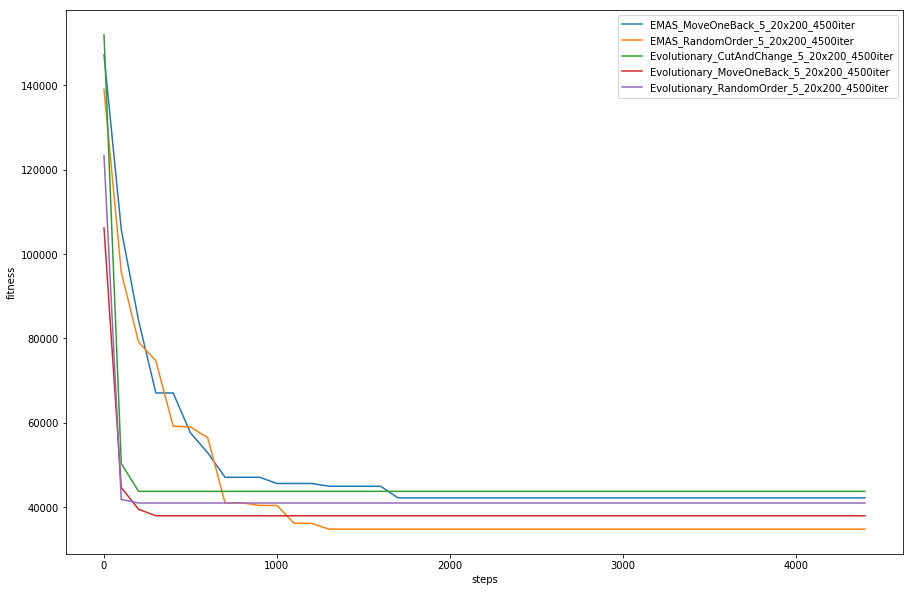

In [101]:
labels_1, steps_1, fitnesses_1 = get_data(by_mut_prob, "5")
plot_the_plot(labels_1, steps_1, fitnesses_1, (15, 10))

<b>Wniosek</b>
Ze wszystkich programów najlepiej zbieżny jest EMAS z mutacją RandomOrder oraz jej prawdopodobieństwem wynoszącym 5%.

<b>Wnioski końcowe:</b>

- Najczęściej najszybciej zbieżny były EMAS, jednak czasami lepszy okazywał się algorytm ewolucyjny z mutacją CutAndChange.
- Mutacja typu MoveOneBack okazała się najgorszym typem mutacji.
- Najszybciej zbieżne okazały się algorytmy z prawdopodobieństwami mutacji wynoszącymi 0.5% oraz 5%.
- W przypadku algorytmu ewolucyjnego wszystkie wersje bardzo szybko osiągały ostateczną wartość.